In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import datetime
from pandas.plotting import parallel_coordinates
import seaborn as sns 

In [3]:
csv_path = r'Us_Accidents_Arizona_DEC20.csv'

In [4]:
us_data_df = pd.read_csv(csv_path)
us_data_cleaned = us_data_df[['ID','TMC','Severity','Start_Time','End_Time','City','County','State','Zipcode','Country','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Sunrise_Sunset','Stop','Traffic_Signal']]
us_data_cleaned

ID  TMC  Severity        Start_Time          End_Time  \
0       A-513395  201         2   12/31/2020 8:33   12/31/2020 9:18   
1       A-513396  201         2   12/31/2020 9:32  12/31/2020 11:03   
2       A-513397  201         2  12/31/2020 12:54  12/31/2020 19:20   
3       A-513398  201         3  12/31/2020 16:04  12/31/2020 17:28   
4       A-513399  201         2  12/31/2020 18:47  12/31/2020 19:48   
...          ...  ...       ...               ...               ...   
15092  A-1048129  201         2   10/9/2019 21:08   10/9/2019 21:57   
15093  A-1048130  201         2   10/9/2019 21:10   10/9/2019 21:58   
15094  A-1048131  201         2   10/9/2019 21:11   10/9/2019 21:58   
15095  A-1048132  201         2   10/9/2019 21:10   10/9/2019 21:57   
15096  A-1048136  201         2    10/9/2019 4:17    10/9/2019 6:43   

                   City    County State     Zipcode Country  Temperature(F)  \
0         Sun City West  Maricopa    AZ  85375-1800      US            43.0   
1            Wickenburg  Maricopa    AZ  85390-3367      US            45.0   
2      Lake Havasu City    Mohave    AZ       86404      US            60.0   
3              Avondale  Maricopa    AZ       85323      US            57.0   
4              Prescott   Yavapai    AZ       86303      US            36.0   
...                 ...       ...   ...         ...     ...             ...   
15092          Glendale  Maricopa    AZ       85307      US            86.0   
15093            Tucson      Pima    AZ       85712      US            75.0   
15094             Tempe  Maricopa    AZ       85283      US            88.0   
15095             Tempe  Maricopa    AZ  85281-3715      US            88.0   
15096          Chambers    Apache    AZ       86502      US            50.0   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                10.0              5.0                0.0            Cloudy   
1                10.0              3.0                0.0     Light Drizzle   
2                10.0             12.0                0.0              Fair   
3                10.0              5.0                NaN            Cloudy   
4                10.0              6.0                0.0            Cloudy   
...               ...              ...                ...               ...   
15092            10.0              0.0                0.0              Fair   
15093            10.0              6.0                0.0              Fair   
15094            10.0             10.0                0.0     Partly Cloudy   
15095            10.0             10.0                0.0     Partly Cloudy   
15096            10.0              6.0                0.0              Fair   

      Sunrise_Sunset   Stop  Traffic_Signal  
0                Day  False            True  
1                Day  False           False  
2                Day   True           False  
3                Day  False           False  
4              Night  False           False  
...              ...    ...             ...  
15092          Night  False            True  
15093          Night  False            True  
15094          Night  False           False  
15095          Night  False           False  
15096          Night  False           False  

[15097 rows x 18 columns]

In [5]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_maricopa = us_data_cleaned.loc[us_data_cleaned['County'] == 'Maricopa']
us_data_maricopa

ID  TMC  Severity       Start_Time          End_Time  \
0       A-513395  201         2  12/31/2020 8:33   12/31/2020 9:18   
1       A-513396  201         2  12/31/2020 9:32  12/31/2020 11:03   
5       A-513400  201         2  12/31/2020 4:52   12/31/2020 6:07   
8       A-513403  201         2  12/31/2020 6:40   12/31/2020 7:10   
9       A-513404  201         2  12/31/2020 6:54   12/31/2020 7:24   
...          ...  ...       ...              ...               ...   
15088  A-1048125  201         3  10/9/2019 19:45   10/9/2019 21:01   
15090  A-1048127  201         3  10/9/2019 19:46   10/9/2019 21:03   
15092  A-1048129  201         2  10/9/2019 21:08   10/9/2019 21:57   
15094  A-1048131  201         2  10/9/2019 21:11   10/9/2019 21:58   
15095  A-1048132  201         2  10/9/2019 21:10   10/9/2019 21:57   

                City    County State     Zipcode Country  Temperature(F)  \
0      Sun City West  Maricopa    AZ  85375-1800      US            43.0   
1         Wickenburg  Maricopa    AZ  85390-3367      US            45.0   
5            Phoenix  Maricopa    AZ  85027-4008      US            40.0   
8            Phoenix  Maricopa    AZ  85020-1812      US            40.0   
9            Phoenix  Maricopa    AZ       85022      US            39.0   
...              ...       ...   ...         ...     ...             ...   
15088        Phoenix  Maricopa    AZ       85034      US            89.0   
15090        Phoenix  Maricopa    AZ       85034      US            89.0   
15092       Glendale  Maricopa    AZ       85307      US            86.0   
15094          Tempe  Maricopa    AZ       85283      US            88.0   
15095          Tempe  Maricopa    AZ  85281-3715      US            88.0   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0                10.0              5.0                0.0            Cloudy   
1                10.0              3.0                0.0     Light Drizzle   
5                10.0              0.0                0.0              Fair   
8                10.0              0.0                0.0              Fair   
9                10.0              0.0                0.0              Fair   
...               ...              ...                ...               ...   
15088            10.0             13.0                0.0              Fair   
15090            10.0             13.0                0.0              Fair   
15092            10.0              0.0                0.0              Fair   
15094            10.0             10.0                0.0     Partly Cloudy   
15095            10.0             10.0                0.0     Partly Cloudy   

      Sunrise_Sunset   Stop  Traffic_Signal  
0                Day  False            True  
1                Day  False           False  
5              Night  False            True  
8              Night  False           False  
9              Night  False            True  
...              ...    ...             ...  
15088          Night  False           False  
15090          Night  False           False  
15092          Night  False            True  
15094          Night  False           False  
15095          Night  False           False  

[8316 rows x 18 columns]

In [6]:
#Update the Start_Time and End_Time columns formatting to remove time stamp
us_data_maricopa['Start_Time']=us_data_maricopa['Start_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['End_Time']=us_data_maricopa['End_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['Zipcode']=us_data_maricopa['Zipcode'].str.split('-', expand=True)[0]

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [7]:
#convert dates
us_data_maricopa['End_Time'] = pd.to_datetime(us_data_maricopa['End_Time'])
us_data_maricopa['Start_Time'] = pd.to_datetime(us_data_maricopa['Start_Time'])

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#creating new columns for Month and Day to create seasons columns
us_data_maricopa["Month"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).month
us_data_maricopa["Day"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).day
us_data_maricopa["Year"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).year
us_data_maricopa["Season"] = ""

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [9]:
#Drop any data from 2019
us_data_maricopa = us_data_maricopa[us_data_maricopa['Year'] == 2020]
us_data_maricopa


ID  TMC  Severity Start_Time   End_Time           City    County  \
0      A-513395  201         2 2020-12-31 2020-12-31  Sun City West  Maricopa   
1      A-513396  201         2 2020-12-31 2020-12-31     Wickenburg  Maricopa   
5      A-513400  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
8      A-513403  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
9      A-513404  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
...         ...  ...       ...        ...        ...            ...       ...   
13310  A-982294  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13311  A-982295  201         2 2020-01-03 2020-01-03      El Mirage  Maricopa   
13313  A-982297  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13314  A-982298  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13315  A-982299  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   

      State Zipcode Country  ...  Wind_Speed(mph)  Precipitation(in)  \
0        AZ   85375      US  ...              5.0                0.0   
1        AZ   85390      US  ...              3.0                0.0   
5        AZ   85027      US  ...              0.0                0.0   
8        AZ   85020      US  ...              0.0                0.0   
9        AZ   85022      US  ...              0.0                0.0   
...     ...     ...     ...  ...              ...                ...   
13310    AZ   85016      US  ...              3.0                0.0   
13311    AZ   85335      US  ...              0.0                0.0   
13313    AZ   85042      US  ...              3.0                0.0   
13314    AZ   85031      US  ...              6.0                0.0   
13315    AZ   85040      US  ...              6.0                0.0   

       Weather_Condition  Sunrise_Sunset   Stop Traffic_Signal  Month  Day  \
0                 Cloudy             Day  False           True     12   31   
1          Light Drizzle             Day  False          False     12   31   
5                   Fair           Night  False           True     12   31   
8                   Fair           Night  False          False     12   31   
9                   Fair           Night  False           True     12   31   
...                  ...             ...    ...            ...    ...  ...   
13310      Partly Cloudy           Night  False           True      1    3   
13311      Partly Cloudy           Night  False           True      1    3   
13313               Fair           Night  False           True      1    3   
13314               Fair           Night  False           True      1    3   
13315               Fair           Night  False           True      1    3   

       Year  Season  
0      2020          
1      2020          
5      2020          
8      2020          
9      2020          
...     ...     ...  
13310  2020          
13311  2020          
13313  2020          
13314  2020          
13315  2020          

[7027 rows x 22 columns]

In [10]:
#inserting seasons columns based on month and day
us_data_maricopa.loc[(us_data_maricopa["Month"] == 1), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] == 2), ["Season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 3) & (us_data_maricopa["Month"] <= 5), ["Season"]] = "Spring"
us_data_maricopa.loc[(us_data_maricopa["Month"] >= 6) & (us_data_maricopa["Month"] <= 8), ["Season"]] = "Summer"

us_data_maricopa.loc[(us_data_maricopa["Month"] >= 9) & (us_data_maricopa["Month"] <= 11), ["Season"]] = "Autumn"

us_data_maricopa.loc[(us_data_maricopa["Month"] == 12), ["Season"]] = "Winter"
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

ID  TMC  Severity Start_Time   End_Time           City    County  \
0      A-513395  201         2 2020-12-31 2020-12-31  Sun City West  Maricopa   
1      A-513396  201         2 2020-12-31 2020-12-31     Wickenburg  Maricopa   
5      A-513400  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
8      A-513403  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
9      A-513404  201         2 2020-12-31 2020-12-31        Phoenix  Maricopa   
...         ...  ...       ...        ...        ...            ...       ...   
13310  A-982294  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13311  A-982295  201         2 2020-01-03 2020-01-03      El Mirage  Maricopa   
13313  A-982297  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13314  A-982298  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   
13315  A-982299  201         2 2020-01-03 2020-01-03        Phoenix  Maricopa   

      State Zipcode Country  ...  Wind_Speed(mph)  Precipitation(in)  \
0        AZ   85375      US  ...              5.0                0.0   
1        AZ   85390      US  ...              3.0                0.0   
5        AZ   85027      US  ...              0.0                0.0   
8        AZ   85020      US  ...              0.0                0.0   
9        AZ   85022      US  ...              0.0                0.0   
...     ...     ...     ...  ...              ...                ...   
13310    AZ   85016      US  ...              3.0                0.0   
13311    AZ   85335      US  ...              0.0                0.0   
13313    AZ   85042      US  ...              3.0                0.0   
13314    AZ   85031      US  ...              6.0                0.0   
13315    AZ   85040      US  ...              6.0                0.0   

       Weather_Condition  Sunrise_Sunset   Stop Traffic_Signal  Month  Day  \
0                 Cloudy             Day  False           True     12   31   
1          Light Drizzle             Day  False          False     12   31   
5                   Fair           Night  False           True     12   31   
8                   Fair           Night  False          False     12   31   
9                   Fair           Night  False           True     12   31   
...                  ...             ...    ...            ...    ...  ...   
13310      Partly Cloudy           Night  False           True      1    3   
13311      Partly Cloudy           Night  False           True      1    3   
13313               Fair           Night  False           True      1    3   
13314               Fair           Night  False           True      1    3   
13315               Fair           Night  False           True      1    3   

       Year  Season  
0      2020  Winter  
1      2020  Winter  
5      2020  Winter  
8      2020  Winter  
9      2020  Winter  
...     ...     ...  
13310  2020  Winter  
13311  2020  Winter  
13313  2020  Winter  
13314  2020  Winter  
13315  2020  Winter  

[7027 rows x 22 columns]

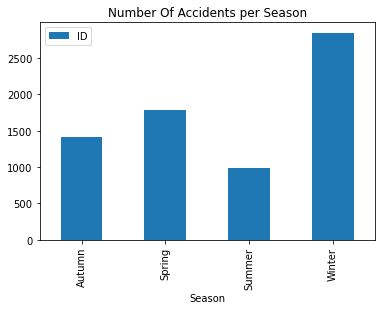

In [11]:
#Average Number of accidents per month/season
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count = us_data_maricopa.groupby('Season').count()
season_count_clean = season_count['ID']
season_count_clean = pd.DataFrame(season_count_clean)
season_count_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [12]:
#get count of days per Season
#count_seasons_grouped = count_seasons.groupby['Season'].
count_seasons = us_data_maricopa.groupby(['Season'])
count_seasons = count_seasons['Start_Time'].nunique()
count_seasons

Season
Autumn    90
Spring    86
Summer    61
Winter    89
Name: Start_Time, dtype: int64

In [13]:
#Highest per day
highest_per_day = us_data_maricopa.groupby(['Start_Time']).nunique()
highest_per_days = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].max()]


In [14]:
lowest_per_day = highest_per_day[highest_per_day['ID']==highest_per_day['ID'].min()]

In [15]:
#average number of accidents per recorded day
average_per_day = highest_per_day['ID'].mean()
average_per_day

21.55521472392638

In [16]:
#Accident Location vs Total Annual Accidents
#Cities with Most Accidents (Top 5)
city_count = us_data_maricopa.groupby(['City']).nunique()
top_5_cities = city_count.sort_values('ID', ascending=False)


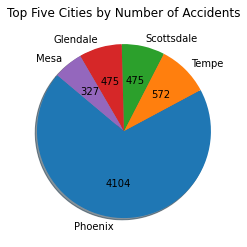

In [17]:
x_values = ['Phoenix','Tempe','Scottsdale','Glendale','Mesa']
y_values = [4104,572,475,475,327]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct
plt.pie(y_values,labels=x_values,startangle=140,autopct=make_autopct(y_values),shadow=True)
plt.title("Top Five Cities by Number of Accidents")
plt.show()

In [18]:
#Highest Days and Weather conditions
feb13_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-13')]
feb20_data = us_data_maricopa.loc[(us_data_maricopa['Start_Time'] == '2020-02-20')]


In [19]:
feb13_data = feb13_data.groupby(['Weather_Condition']).nunique()



In [20]:
feb20_data = feb20_data.groupby(['Weather_Condition']).nunique()

In [77]:
average_weather = us_data_maricopa.groupby('Start_Time').mean()
accident_count = us_data_maricopa.groupby('Start_Time').count()
accident_count

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-01-01  22   22        22        22    22      22     22       22   
2020-01-02  54   54        54        54    54      54     54       54   
2020-01-03  62   62        62        62    62      62     62       62   
2020-01-04   6    6         6         6     6       6      6        6   
2020-01-05   7    7         7         7     7       7      7        7   
...         ..  ...       ...       ...   ...     ...    ...      ...   
2020-12-27   7    7         7         7     7       7      7        7   
2020-12-28  18   18        18        18    18      18     18       18   
2020-12-29  14   14        14        14    14      14     14       14   
2020-12-30  25   25        25        25    25      25     25       25   
2020-12-31  15   15        15        15    15      15     15       15   

            Country  Temperature(F)  ...  Wind_Speed(mph)  Precipitation(in)  \
Start_Time                           ...                                       
2020-01-01       22              22  ...               22                 22   
2020-01-02       54              54  ...               54                 54   
2020-01-03       62              62  ...               62                 62   
2020-01-04        6               6  ...                6                  6   
2020-01-05        7               7  ...                7                  7   
...             ...             ...  ...              ...                ...   
2020-12-27        7               7  ...                7                  7   
2020-12-28       18              18  ...               18                 18   
2020-12-29       14              14  ...               14                 14   
2020-12-30       25              25  ...               25                 25   
2020-12-31       15              15  ...               15                 15   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Month  \
Start_Time                                                                   
2020-01-01                 22              22    22              22     22   
2020-01-02                 54              54    54              54     54   
2020-01-03                 62              62    62              62     62   
2020-01-04                  6               6     6               6      6   
2020-01-05                  7               7     7               7      7   
...                       ...             ...   ...             ...    ...   
2020-12-27                  7               7     7               7      7   
2020-12-28                 18              18    18              18     18   
2020-12-29                 14              14    14              14     14   
2020-12-30                 25              25    25              25     25   
2020-12-31                 15              15    15              15     15   

            Day  Year  Season  
Start_Time                     
2020-01-01   22    22      22  
2020-01-02   54    54      54  
2020-01-03   62    62      62  
2020-01-04    6     6       6  
2020-01-05    7     7       7  
...         ...   ...     ...  
2020-12-27    7     7       7  
2020-12-28   18    18      18  
2020-12-29   14    14      14  
2020-12-30   25    25      25  
2020-12-31   15    15      15  

[326 rows x 21 columns]

In [21]:
highest_per_day

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-01-01  22    1         2         1     9       1      1       18   
2020-01-02  54    2         2         1     9       1      1       36   
2020-01-03  62    3         2         1    12       1      1       34   
2020-01-04   6    3         2         1     3       1      1        5   
2020-01-05   7    1         2         1     3       1      1        7   
...         ..  ...       ...       ...   ...     ...    ...      ...   
2020-12-27   7    2         2         1     3       1      1        7   
2020-12-28  18    1         2         1     7       1      1       16   
2020-12-29  14    2         2         1     4       1      1       11   
2020-12-30  25    4         2         1     5       1      1       15   
2020-12-31  15    1         2         1     8       1      1       15   

            Country  Temperature(F)  ...  Wind_Speed(mph)  Precipitation(in)  \
Start_Time                           ...                                       
2020-01-01        1              13  ...                4                  1   
2020-01-02        1              20  ...               10                  1   
2020-01-03        1              18  ...                5                  1   
2020-01-04        1               5  ...                3                  1   
2020-01-05        1               5  ...                3                  1   
...             ...             ...  ...              ...                ...   
2020-12-27        1               6  ...                4                  1   
2020-12-28        1              12  ...                7                  1   
2020-12-29        1               8  ...                8                  1   
2020-12-30        1              15  ...                8                  1   
2020-12-31        1              11  ...                5                  1   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Month  \
Start_Time                                                                   
2020-01-01                  4               2     2               2      1   
2020-01-02                  1               2     2               2      1   
2020-01-03                  3               2     2               2      1   
2020-01-04                  2               1     1               2      1   
2020-01-05                  3               2     1               2      1   
...                       ...             ...   ...             ...    ...   
2020-12-27                  3               2     1               2      1   
2020-12-28                  2               2     2               2      1   
2020-12-29                  4               2     1               2      1   
2020-12-30                  1               2     2               2      1   
2020-12-31                  4               2     2               2      1   

            Day  Year  Season  
Start_Time                     
2020-01-01    1     1       1  
2020-01-02    1     1       1  
2020-01-03    1     1       1  
2020-01-04    1     1       1  
2020-01-05    1     1       1  
...         ...   ...     ...  
2020-12-27    1     1       1  
2020-12-28    1     1       1  
2020-12-29    1     1       1  
2020-12-30    1     1       1  
2020-12-31    1     1       1  

[326 rows x 21 columns]

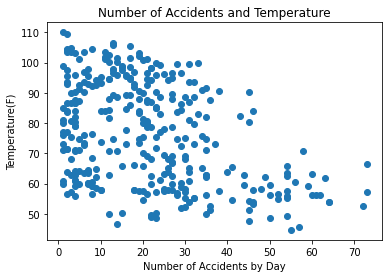

In [90]:
#Graph scatterplot to compare the Accident per day VS Temperature
xvalue = accident_count['ID']
yvalue = average_weather['Temperature(F)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Temperature')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Temperature(F)')
plt.show()

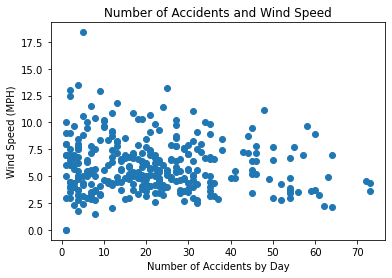

In [89]:
#Create Scatterplot to show correlation between accidents per day and windspeed
xvalue = accident_count['ID']
yvalue = average_weather['Wind_Speed(mph)']
plt.scatter(xvalue,yvalue)
plt.title('Number of Accidents and Wind Speed')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Wind Speed (MPH)')
plt.show()

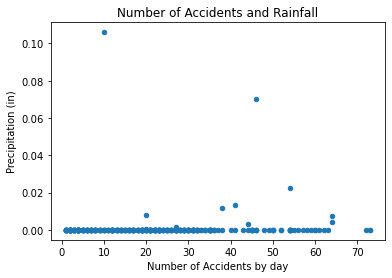

In [87]:
#Create a scatter plot to show correlation between rainfall and accidents per day
xvalue = accident_count['ID']
yvalue = average_weather['Precipitation(in)']
plt.scatter(xvalue,yvalue, s=20)
plt.title('Number of Accidents and Rainfall')
plt.xlabel('Number of Accidents by Day')
plt.ylabel('Precipitation (in)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

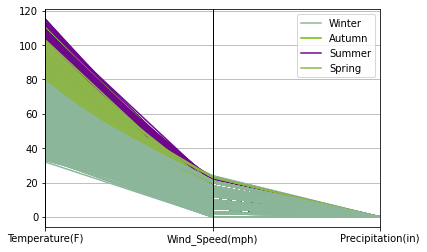

In [22]:
#total accidents and weather type
#scatter plot-- x-axis number grouped by accidents per day
#graph precipitation- windspeed- and temperature
parallel_coordinates(us_data_maricopa, class_column='Season', cols=['Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)'])
plt.show

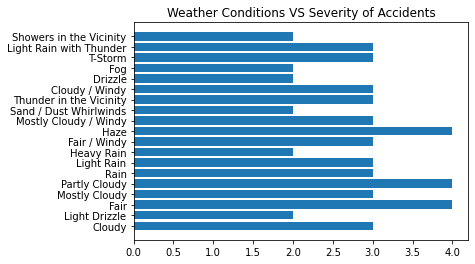

In [23]:
#line graph of severity count

x_value = us_data_maricopa['Weather_Condition']
y_values = us_data_maricopa['Severity']
plt.barh(x_value,y_values)
plt.title('Weather Conditions VS Severity of Accidents')
plt.show()

In [24]:
#LOOK INTO COCONINO COUNTY FOR WEATHER VS ACCIDENTS IN COMPARISON TO MARICOPA
#REVIEW PLAN TO CONFIRM WITH HANSEE IF IT MEETS REQUIREMENTS
# CONFIRM WHAT LINEAR REGRESSION TO USE FOR WHAT DATA???


In [25]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_coconino = us_data_cleaned.loc[us_data_cleaned['County'] == 'Coconino']


ID  TMC  Severity        Start_Time          End_Time  \
98      A-516241  201         3  12/29/2020 18:57  12/29/2020 21:09   
319     A-524995  201         2  12/21/2020 15:47  12/21/2020 16:34   
410     A-529604  201         3  12/17/2020 11:48  12/17/2020 14:41   
554     A-535397  201         3  12/13/2020 10:53  12/13/2020 15:25   
706     A-541007  201         3    12/9/2020 4:06    12/9/2020 7:15   
...          ...  ...       ...               ...               ...   
14694  A-1035894  339         3  12/22/2019 15:35  12/22/2019 17:12   
14749  A-1038127  201         4  12/23/2019 16:41  12/23/2019 17:59   
14828  A-1040520  343         3    10/6/2019 5:13    10/6/2019 9:28   
14940  A-1042906  241         3   10/7/2019 19:50   10/7/2019 21:24   
15035  A-1048072  201         3    10/9/2019 7:28    10/9/2019 8:29   

               City    County State     Zipcode Country  Temperature(F)  \
98        Flagstaff  Coconino    AZ       86001      US            27.0   
319       Flagstaff  Coconino    AZ  86004-6011      US            52.0   
410       Flagstaff  Coconino    AZ       86004      US            41.0   
554       Flagstaff  Coconino    AZ       86005      US            26.0   
706       Flagstaff  Coconino    AZ       86004      US            16.0   
...             ...       ...   ...         ...     ...             ...   
14694     Flagstaff  Coconino    AZ       86001      US            46.0   
14749     Flagstaff  Coconino    AZ       86004      US            40.0   
14828  Forest Lakes  Coconino    AZ       85931      US            48.0   
14940     Flagstaff  Coconino    AZ       86001      US            54.0   
15035     Flagstaff  Coconino    AZ       86005      US            38.0   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
98               10.0              7.0                0.0            Cloudy   
319              10.0              7.0                0.0              Fair   
410              10.0             14.0                0.0              Fair   
554              10.0             14.0                0.0              Fair   
706              10.0              0.0                0.0              Fair   
...               ...              ...                ...               ...   
14694            10.0              9.0                0.0     Mostly Cloudy   
14749            10.0             18.0                0.0     Mostly Cloudy   
14828            10.0              0.0                0.0              Fair   
14940            10.0              0.0                0.0              Fair   
15035            10.0              8.0                0.0     Partly Cloudy   

      Sunrise_Sunset   Stop  Traffic_Signal  
98             Night  False           False  
319              Day  False           False  
410              Day  False           False  
554              Day  False           False  
706            Night  False           False  
...              ...    ...             ...  
14694            Day  False           False  
14749            Day  False           False  
14828          Night  False           False  
14940          Night  False           False  
15035            Day  False           False  

[121 rows x 18 columns]

In [26]:
#Convert dates in Start Time into columns 
us_data_coconino['Start_Time']=us_data_coconino['Start_Time'].str.split(' ', expand=True)[0]
us_data_coconino['End_Time']=us_data_coconino['End_Time'].str.split(' ', expand=True)[0]
us_data_coconino['Zipcode']=us_data_coconino['Zipcode'].str.split('-', expand=True)[0]
us_data_coconino['End_Time'] = pd.to_datetime(us_data_coconino['End_Time'])
us_data_coconino['Start_Time'] = pd.to_datetime(us_data_coconino['Start_Time'])
us_data_coconino["Month"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).month
us_data_coconino["Day"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).day
us_data_coconino["Year"] = pd.DatetimeIndex(us_data_coconino["Start_Time"]).year
us_data_coconino["Season"] = ""

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [32]:
#convert months to season columns
us_data_coconino = us_data_coconino[us_data_coconino['Year'] == 2020]
us_data_coconino.loc[(us_data_coconino["Month"] == 1), ["Season"]] = "Winter"
us_data_coconino.loc[(us_data_coconino["Month"] == 2), ["Season"]] = "Winter"
us_data_coconino.loc[(us_data_coconino["Month"] >= 3) & (us_data_coconino["Month"] <= 5), ["Season"]] = "Spring"
us_data_coconino.loc[(us_data_coconino["Month"] >= 6) & (us_data_coconino["Month"] <= 8), ["Season"]] = "Summer"
us_data_coconino.loc[(us_data_coconino["Month"] >= 9) & (us_data_coconino["Month"] <= 11), ["Season"]] = "Autumn"
us_data_coconino.loc[(us_data_coconino["Month"] == 12), ["Season"]] = "Winter"
us_data_coconino.reset_index(drop=True)

ID  TMC  Severity Start_Time   End_Time          City    County  \
0    A-516241  201         3 2020-12-29 2020-12-29     Flagstaff  Coconino   
1    A-524995  201         2 2020-12-21 2020-12-21     Flagstaff  Coconino   
2    A-529604  201         3 2020-12-17 2020-12-17     Flagstaff  Coconino   
3    A-535397  201         3 2020-12-13 2020-12-13     Flagstaff  Coconino   
4    A-541007  201         3 2020-12-09 2020-12-09     Flagstaff  Coconino   
..        ...  ...       ...        ...        ...           ...       ...   
98   A-966950  241         3 2020-02-22 2020-02-22     Flagstaff  Coconino   
99   A-967543  201         2 2020-02-23 2020-02-23  Grand Canyon  Coconino   
100  A-971615  343         4 2020-02-25 2020-02-25     Flagstaff  Coconino   
101  A-980441  406         3 2020-01-02 2020-01-02     Flagstaff  Coconino   
102  A-980447  201         2 2020-01-02 2020-01-02     Flagstaff  Coconino   

    State Zipcode Country  ...  Wind_Speed(mph)  Precipitation(in)  \
0      AZ   86001      US  ...              7.0                0.0   
1      AZ   86004      US  ...              7.0                0.0   
2      AZ   86004      US  ...             14.0                0.0   
3      AZ   86005      US  ...             14.0                0.0   
4      AZ   86004      US  ...              0.0                0.0   
..    ...     ...     ...  ...              ...                ...   
98     AZ   86004      US  ...              8.0                0.0   
99     AZ   86023      US  ...              9.0                0.0   
100    AZ   86004      US  ...              0.0                0.0   
101    AZ   86001      US  ...              0.0                0.0   
102    AZ   86001      US  ...              0.0                0.0   

     Weather_Condition  Sunrise_Sunset   Stop Traffic_Signal  Month  Day  \
0               Cloudy           Night  False          False     12   29   
1                 Fair             Day  False          False     12   21   
2                 Fair             Day  False          False     12   17   
3                 Fair             Day  False          False     12   13   
4                 Fair           Night  False          False     12    9   
..                 ...             ...    ...            ...    ...  ...   
98              Cloudy           Night  False          False      2   22   
99                Fair             Day  False          False      2   23   
100               Fair           Night  False          False      2   25   
101      Partly Cloudy           Night  False          False      1    2   
102               Fair           Night  False          False      1    2   

     Year  Season  
0    2020  Winter  
1    2020  Winter  
2    2020  Winter  
3    2020  Winter  
4    2020  Winter  
..    ...     ...  
98   2020  Winter  
99   2020  Winter  
100  2020  Winter  
101  2020  Winter  
102  2020  Winter  

[103 rows x 22 columns]

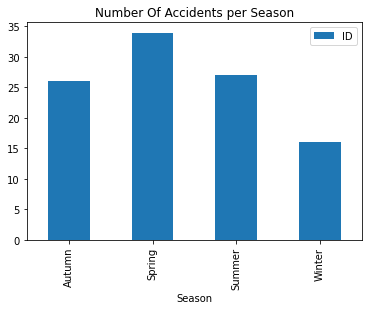

In [34]:
#Average Number of accidents per month/seasonw for Coconino
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count_coco = us_data_coconino.groupby('Season').count()
season_count_coco_clean = season_count_coco['ID']
season_count_coco_clean = pd.DataFrame(season_count_coco_clean)
season_count_coco_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [35]:
#get count of days per Season- Coconino
count_seasons_coco = us_data_coconino.groupby(['Season'])
count_seasons_coco = count_seasons_coco['Start_Time'].nunique()
count_seasons_coco

Season
Autumn    18
Spring    24
Summer    15
Winter    14
Name: Start_Time, dtype: int64

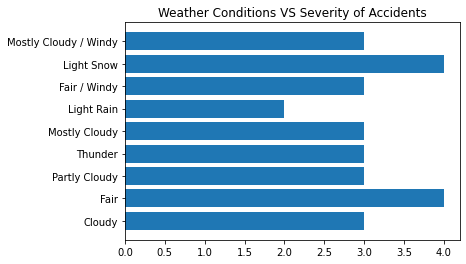

In [36]:
#Create Graph to show Weather conditions vs amount of accidents
x_value = us_data_coconino['Weather_Condition']
y_values = us_data_coconino['Severity']
plt.barh(x_value,y_values)
plt.title('Weather Conditions VS Severity of Accidents')
plt.show()

In [39]:
#Highest per day for Coconino Countuy
highest_perday = us_data_coconino.groupby(['Start_Time']).nunique()
highest_perdays = highest_perday[highest_perday['ID']==highest_perday['ID'].max()]
highest_perdays

ID  TMC  Severity  End_Time  City  County  State  Zipcode  \
Start_Time                                                              
2020-08-19   4    2         2         1     3       1      1        3   
2020-08-26   4    1         2         1     3       1      1        3   
2020-11-18   4    1         2         1     2       1      1        3   

            Country  Temperature(F)  ...  Wind_Speed(mph)  Precipitation(in)  \
Start_Time                           ...                                       
2020-08-19        1               2  ...                2                  1   
2020-08-26        1               4  ...                2                  1   
2020-11-18        1               3  ...                2                  1   

            Weather_Condition  Sunrise_Sunset  Stop  Traffic_Signal  Month  \
Start_Time                                                                   
2020-08-19                  1               2     1               1      1   
2020-08-26                  3               1     1               1      1   
2020-11-18                  1               1     1               1      1   

            Day  Year  Season  
Start_Time                     
2020-08-19    1     1       1  
2020-08-26    1     1       1  
2020-11-18    1     1       1  

[3 rows x 21 columns]

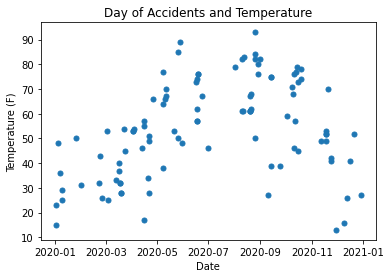

In [58]:
#Create line graph for Coconino
x = us_data_coconino['Start_Time']
y = us_data_coconino['Temperature(F)']
plt.scatter(x,y, s=25)
plt.title('Day of Accidents and Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()